# **Introduction**

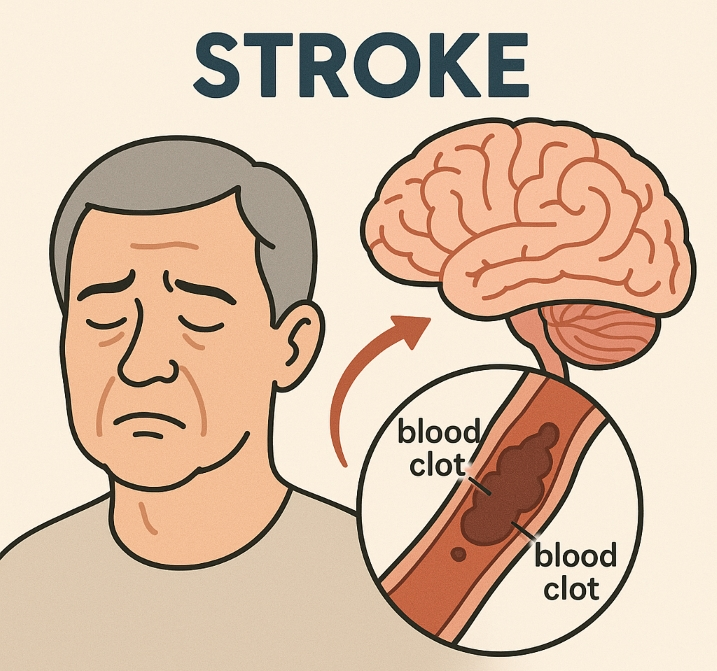

**What is Stroke?**

*A stroke is a life-threatening medical emergency that occurs when the blood flow to the brain is suddenly cut off or one of the brain vessels ruptures, causing damage to the brain tissue. Brain cells constantly need oxygen and nutrients to function. Due to this interruption or decrease in blood flow, brain cells begin to die within minutes.*


**There are two main types of stroke:**

**Ischemic Stroke:** *The most common type of stroke. It occurs when the brain vessels are blocked by a clot or plaque (atherosclerosis). This blockage prevents sufficient blood and oxygen from reaching the relevant area of the brain.*

**Hemorrhagic Stroke:** *It occurs when a blood vessel in the brain ruptures or leaks. The blood leaking from the vessel accumulates in or around the brain tissue, pressuring and damaging the cells. High blood pressure and aneurysms are common causes of hemorrhagic stroke.*

*In both cases, there is a sudden loss or impairment of body functions (such as speech, movement, understanding, vision, etc.) that are controlled by the affected area of the brain. The effects of a stroke vary depending on which part of the brain is damaged and how extensive it is. Early intervention is critical to minimizing permanent damage and improving the chance of recovery.*


**Purpose of the Project**

*Stroke is a leading cause of death and disability worldwide, so early detection, understanding of risk factors, and developing preventive strategies are vital. The main goal of this project is to develop a machine learning model that can predict an individual’s risk of having a stroke by thoroughly analyzing various data such as patient demographics (age, gender, etc.), lifestyle habits (smoking, alcohol consumption, physical activity, etc.), clinical measurements (blood pressure, cholesterol, average glucose level, etc.), and recorded symptoms in a comprehensive dataset called [Stroke Prediction](https://www.kaggle.com/datasets/teamincribo/stroke-prediction).*

**To achieve this goal, a meticulous, multi-stage study was conducted on the dataset:**

1. **Data Loading and Exploratory Data Analysis (EDA):** The project started with loading the dataset and understanding its general structure. Various visualization techniques such as histograms, box plots for numerical features; scatter plots showing the relationship of categorical features with the target variable and heat maps for detecting missing data were used to extract insights from the data.


2. **Extensive Data Cleaning and Transformation:**

* Columns such as Patient ID and Patient Name that were not meaningful for modeling were removed.
* Records with missing values in the Symptoms column were removed from the dataset to increase the reliability of the analysis.
* Combined information such as Cholesterol Levels (as HDL and LDL) and Blood Pressure Levels (as Upper and Lower BP) were decomposed into more granular and meaningful numerical features, allowing the model to better process these critical health indicators.

3. **Feature Engineering and Preprocessing:**
* Nominal and ordinal categorical variables such as Gender, Marital Status, Type of Residence and Family Stroke History were converted to numerical formats (Label Encoding) that machine learning algorithms can process.
* For other categorical features such as Smoking Status, Alcohol Consumption, Physical Activity, Dietary Habits and Work Type, each category was represented as an independent feature with the One-Hot Encoding method (this step is intended to be reviewed and implemented correctly).
* All numerical features such as Age, Average Glucose Level, Body Mass Index (BMI), Stress Levels, HDL, LDL, Upper BP and Lower BP were normalized with Min-Max Scaling to balance the effect of values at different scales on the model and to increase performance.
* Text data in the Symptoms column was preprocessed with natural language processing (NLP) techniques; unnecessary words (stopwords) were removed, the texts were brought to a standard format and then converted into numerical vectors that the model can understand using the CountVectorizer based on word counts and the TfidfVectorizer methods, which reflect word frequencies and their importance in the document set. As a result of this process, the original text columns were removed from the data set.

4. **Creation of Final Data Sets:** After all these preprocessing steps, two separate analysis data sets (new_tfidf_df and new_count_df) containing TF-IDF and Count Vectorizer features were created and these data sets were made ready for the modeling phase.

**Current Status and Next Steps:** The project is currently in the "Creating Models" phase. Using these enriched and cleaned datasets, various machine learning classification algorithms (e.g., Logistic Regression, Decision Trees, Random Forest, Support Vector Machines, Gradient Boosting, etc.) will be trained and their performance will be comprehensively evaluated with appropriate metrics such as accuracy, precision, recall, F1-score, and ROC AUC curve. The ultimate goal is to develop a model that predicts stroke risk in the most accurate and reliable way, is interpretable, and can be used in practical applications.

# **Import the Necessary Libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder
import nltk
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from nltk.corpus import stopwords

import warnings
warnings.filterwarnings("ignore")

# **Load the Dataset**

In [2]:
df = pd.read_csv('/kaggle/input/stroke-prediction/stroke_prediction_dataset.csv')

# **EDA (Exploratory Data Analysis)**

***Define categorical and numeric columns to make our work easier when doing exploratory data analysis***

In [3]:
# Define categorical and numerical columns
numerical_columns = ['Age', 'Average Glucose Level', 'Body Mass Index (BMI)', 'Stress Levels']

categorical_columns = ['Gender', 'Marital Status', 'Work Type', 'Residence Type', 
           'Smoking Status', 'Alcohol Intake', 'Physical Activity', 
           'Family History of Stroke', 'Dietary Habits']

## **Histograms and Boxplots of Numerical Variables** 

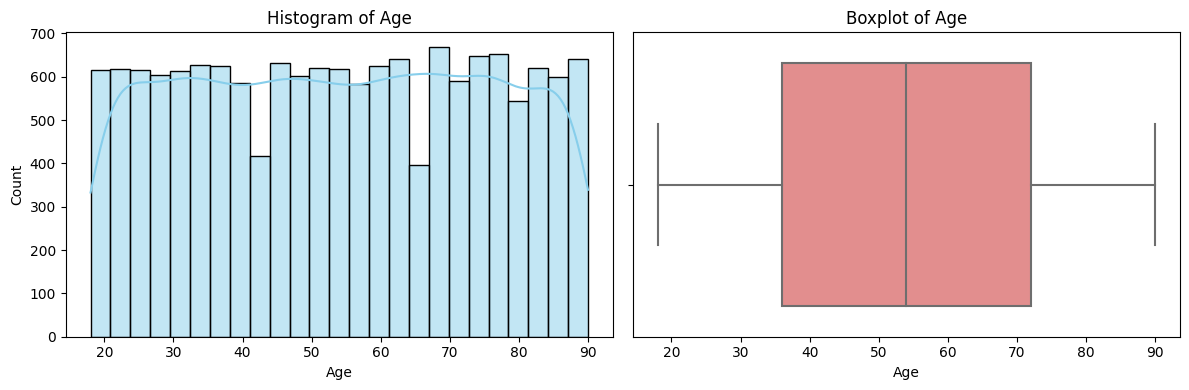

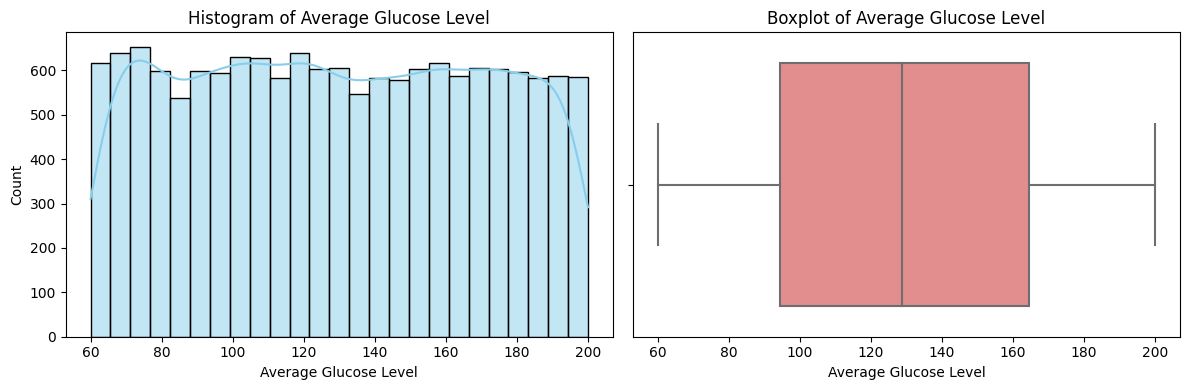

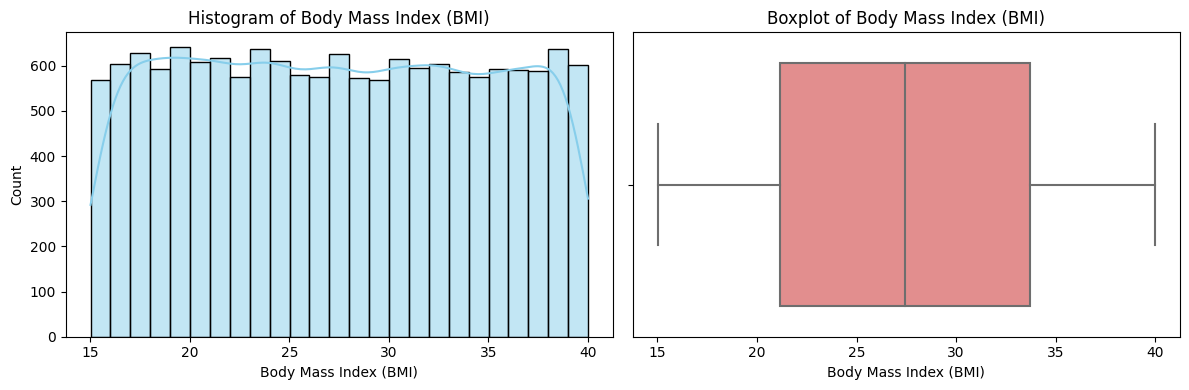

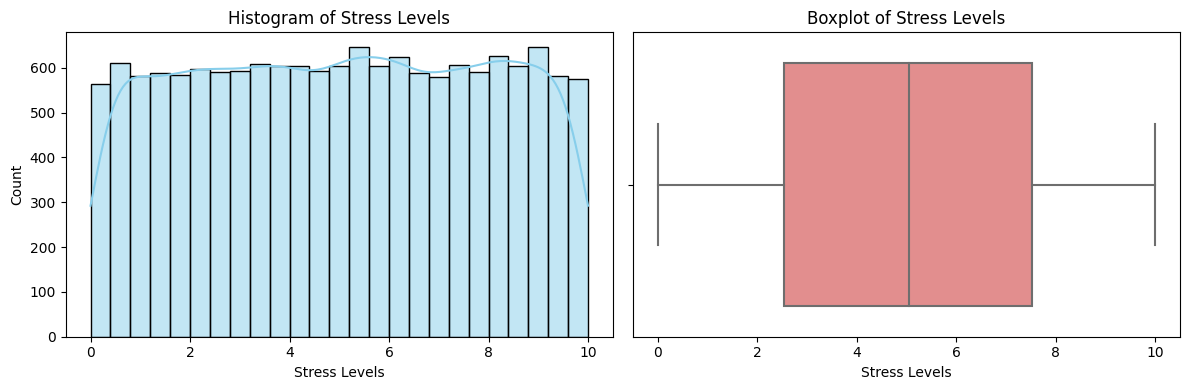

In [4]:
# Histograms and boxplots of numerical variables
for col in numerical_columns:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    sns.histplot(df[col], kde=True, ax=axes[0], color='skyblue')
    axes[0].set_title(f"Histogram of {col}")
    sns.boxplot(x=df[col], ax=axes[1], color='lightcoral')
    axes[1].set_title(f"Boxplot of {col}")
    plt.tight_layout()
    plt.show()

##  **Heatmap of Missing Values**

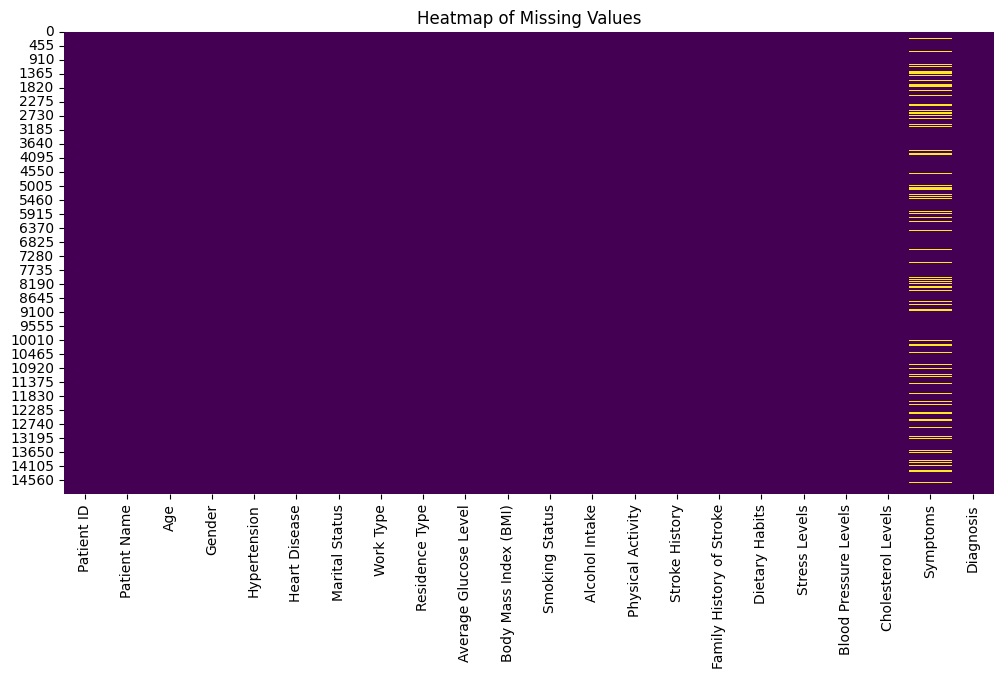

In [5]:
# Heatmap of missing values
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Values')
plt.show()

##  **Histograms of Numerical Variables by Diagnosis**

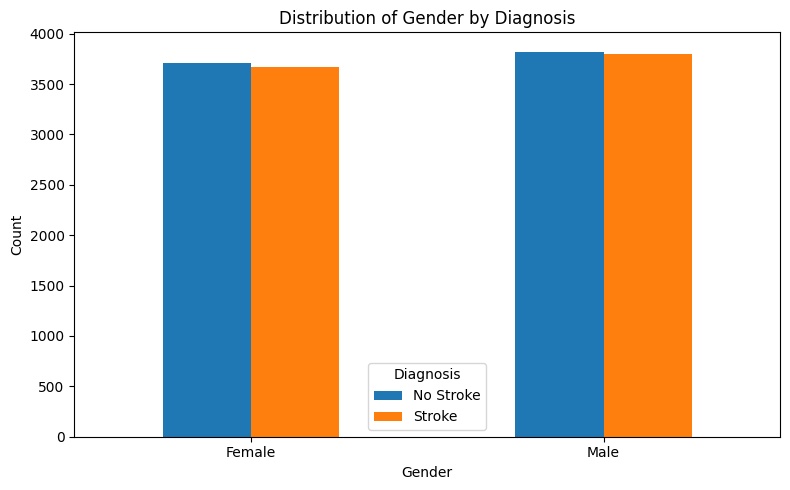

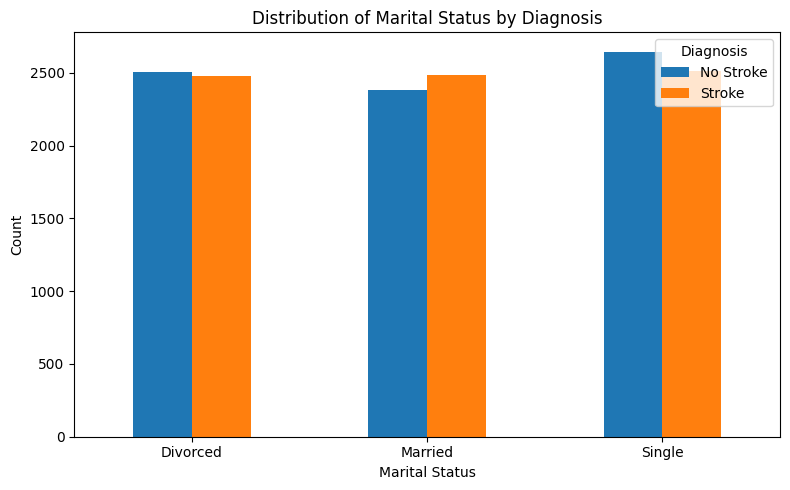

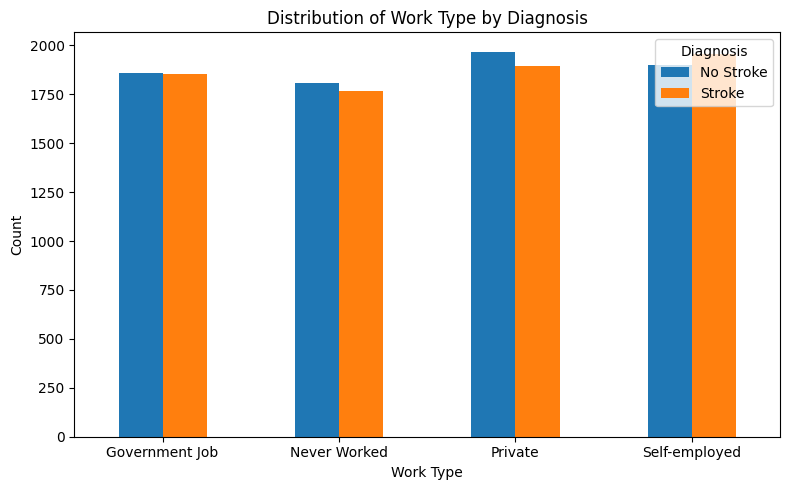

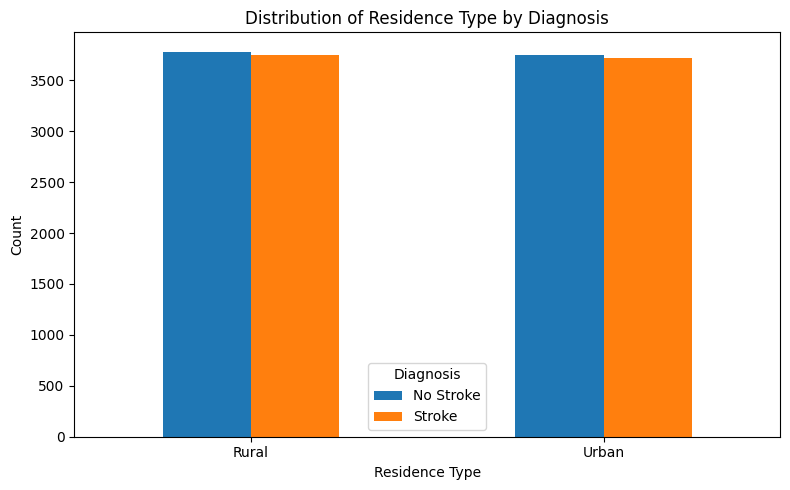

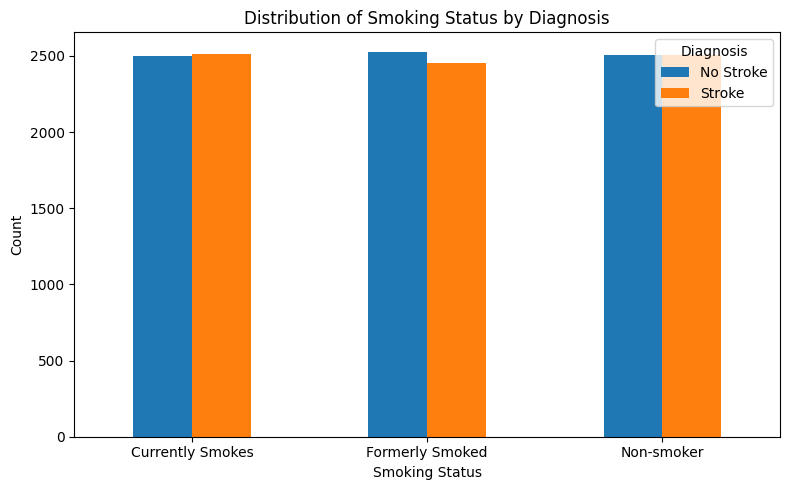

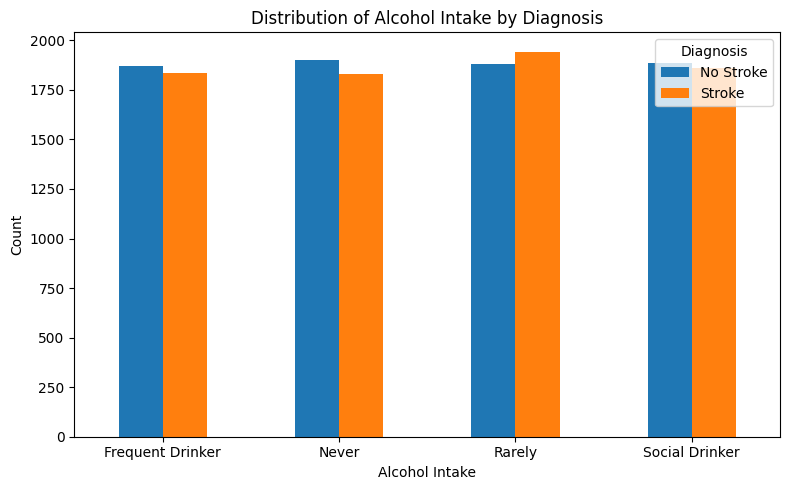

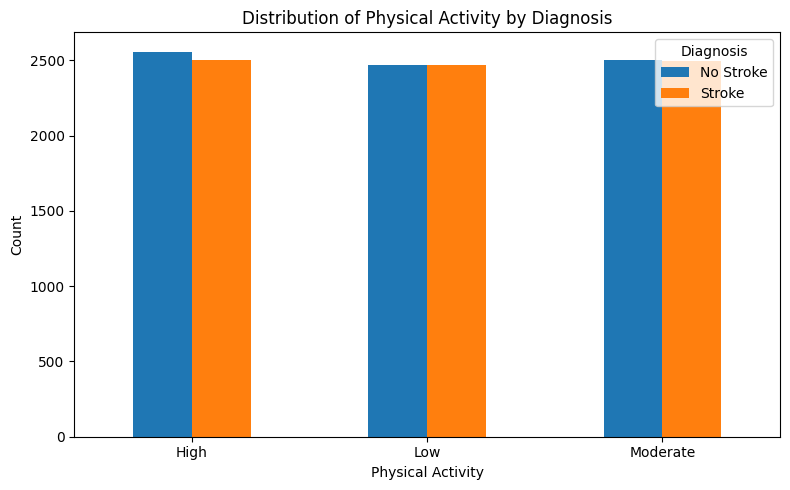

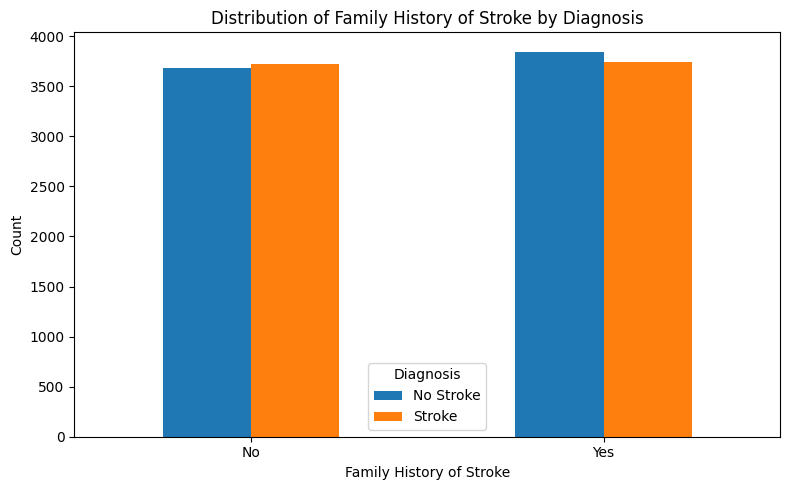

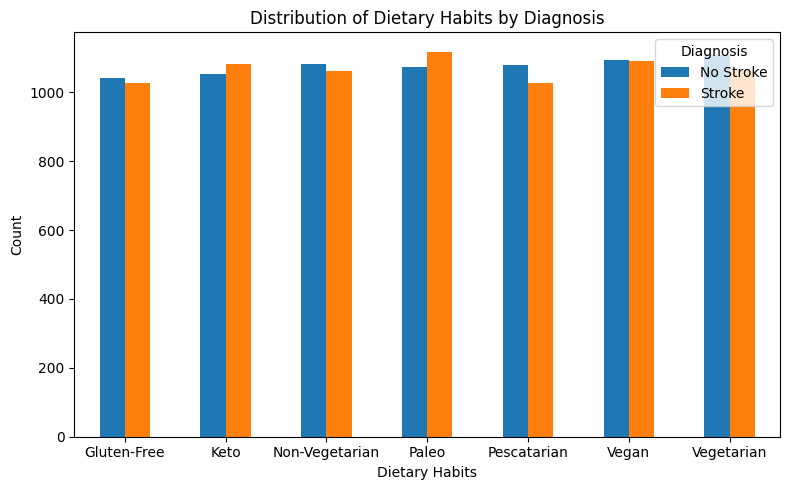

In [6]:
for col in categorical_columns:
    crosstab = pd.crosstab(df[col], df['Diagnosis'])

    crosstab.plot(kind='bar', figsize=(8, 5))

    plt.title(f'Distribution of {col} by Diagnosis')
    plt.xlabel(col)
    plt.xticks(rotation=0)
    plt.ylabel('Count')
    plt.legend(title='Diagnosis')
    
    plt.tight_layout()
    plt.show()

##  **Pie Chart of Categorical Variables**

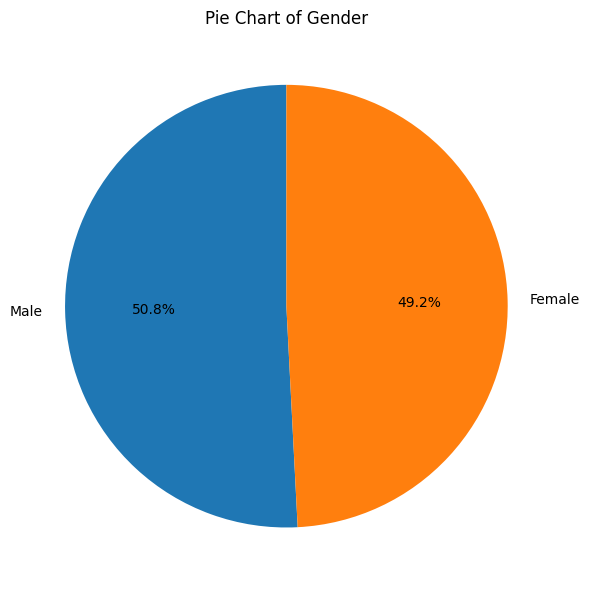

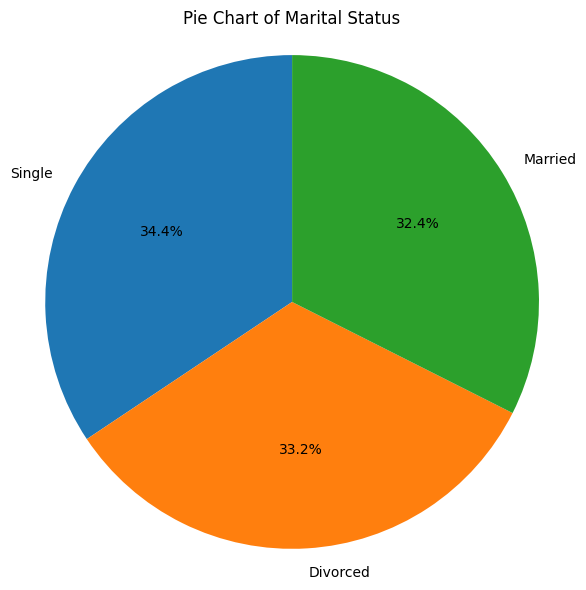

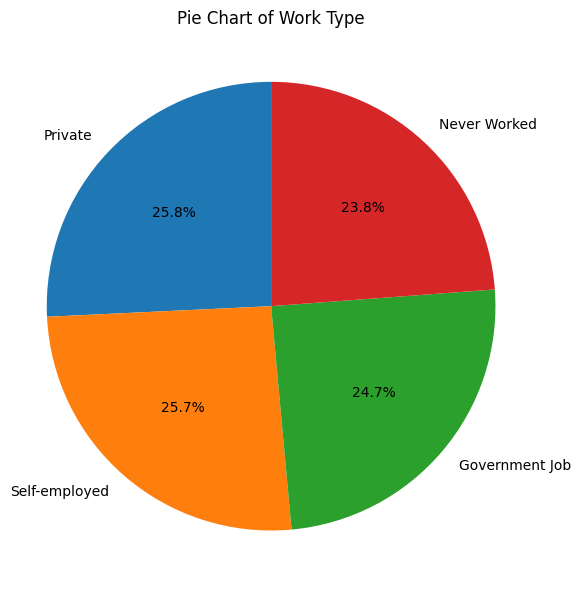

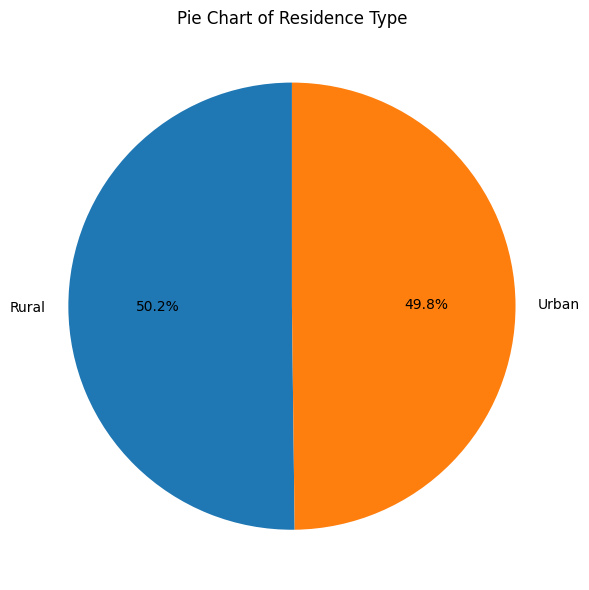

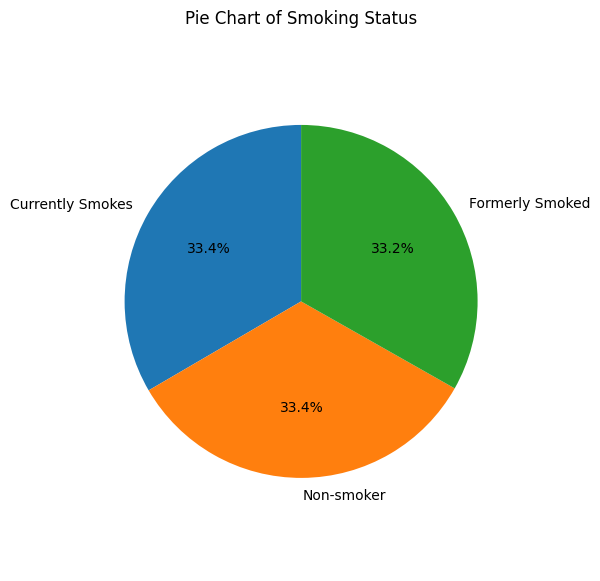

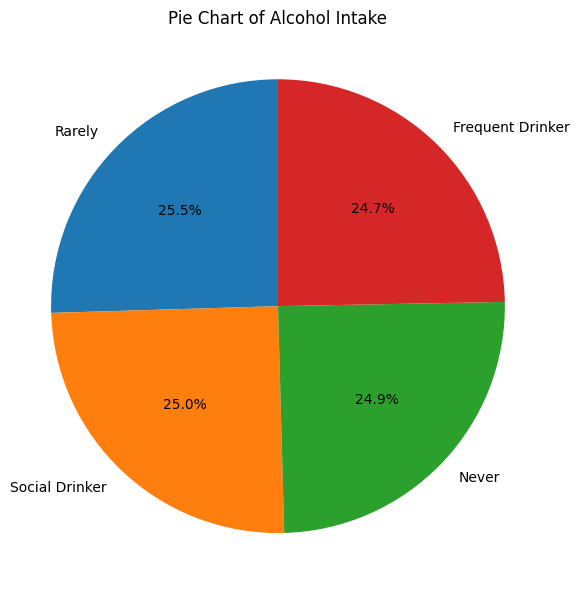

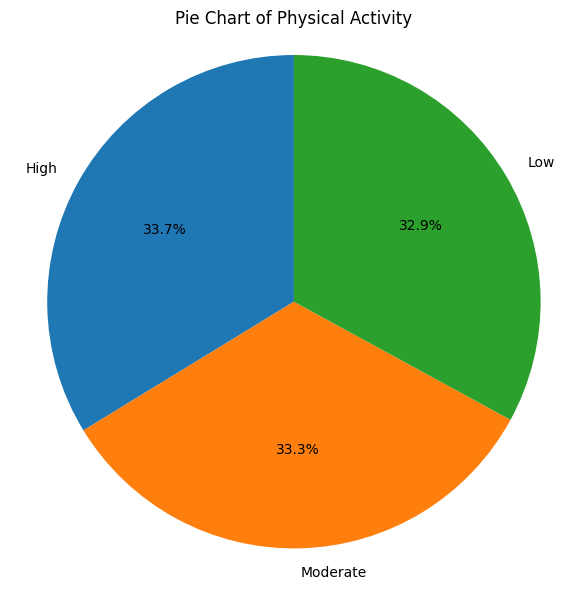

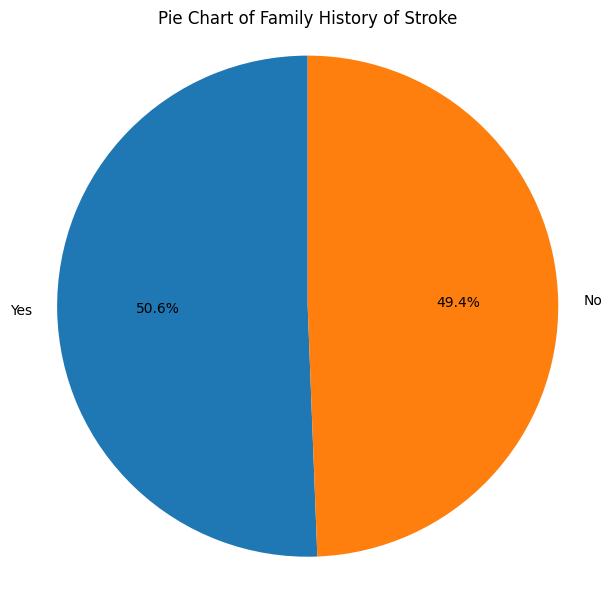

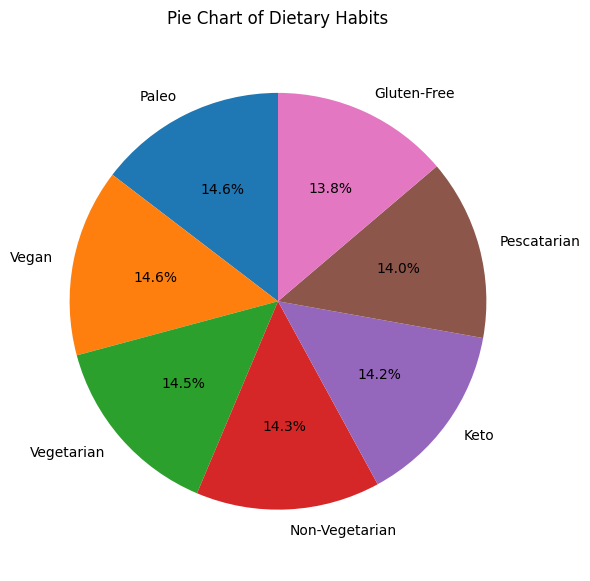

In [7]:
for col in categorical_columns:
    count_series = df[col].value_counts()
    
    plt.figure(figsize=(6, 6))
    plt.pie(count_series.values, labels=count_series.index, autopct='%1.1f%%', startangle=90)
    
    plt.title(f'Pie Chart of {col}')
    plt.axis('equal')
    plt.tight_layout()
    plt.show()

## **Boxplot of Numerical Variables by Diagnosis**

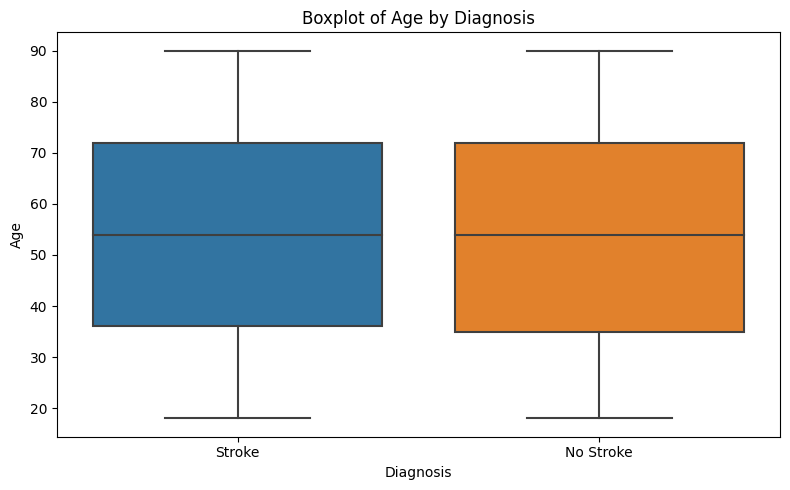

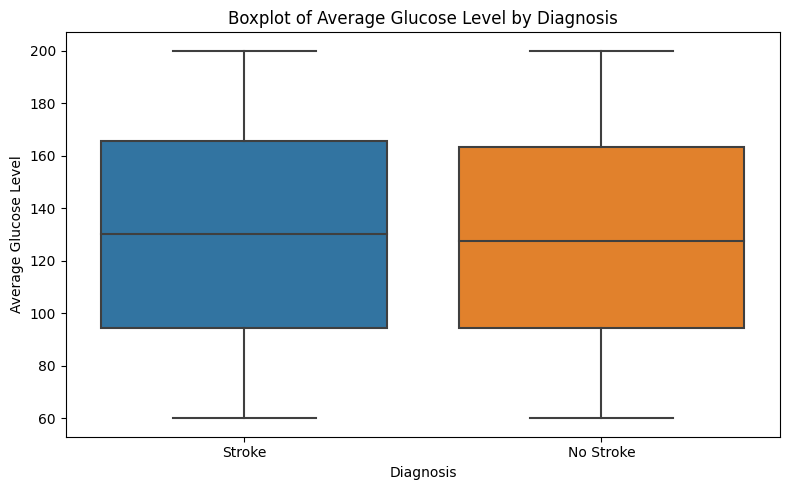

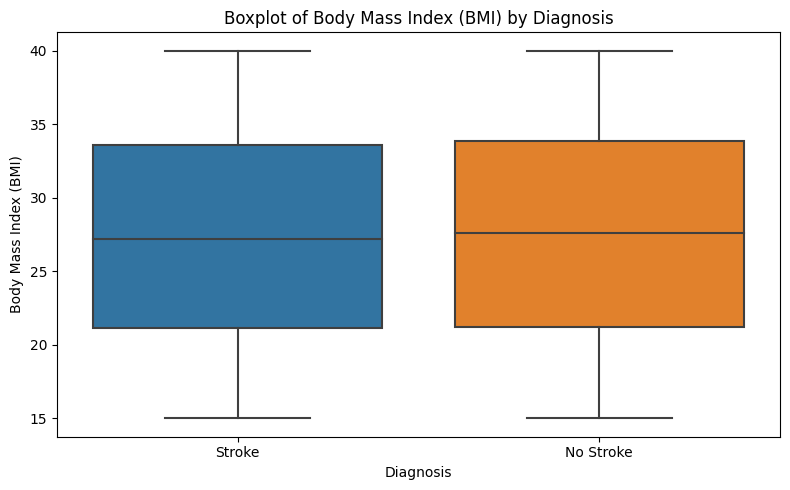

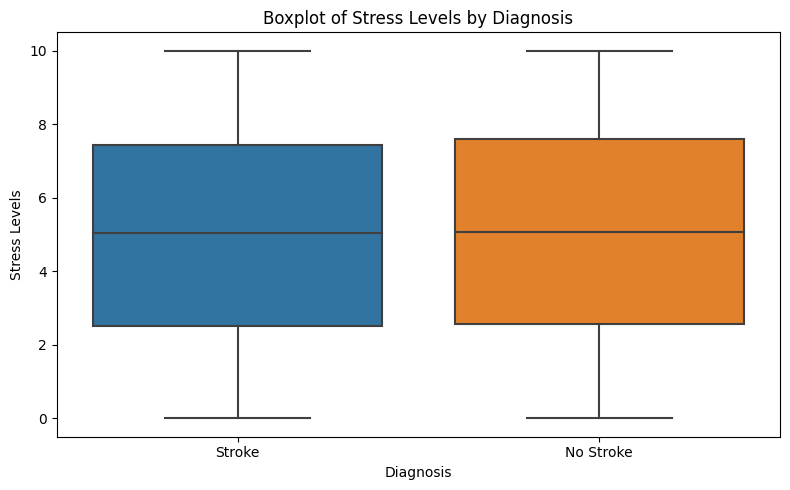

In [8]:
for col in numerical_columns:
    plt.figure(figsize=(8, 5))
    
    sns.boxplot(data=df, x='Diagnosis', y=col)

    plt.title(f'Boxplot of {col} by Diagnosis')
    plt.xlabel('Diagnosis')
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

# **Understand And Organize the Dataset**

In [9]:
df.head()

Patient ID       Patient Name  Age Gender  Hypertension  Heart Disease  \
0       18153    Mamooty Khurana   56   Male             0              1   
1       62749  Kaira Subramaniam   80   Male             0              0   
2       32145      Dhanush Balan   26   Male             1              1   
3        6154        Ivana Baral   73   Male             0              0   
4       48973  Darshit Jayaraman   51   Male             1              1   

  Marital Status      Work Type Residence Type  Average Glucose Level  ...  \
0        Married  Self-employed          Rural                 130.91  ...   
1         Single  Self-employed          Urban                 183.73  ...   
2        Married   Never Worked          Rural                 189.00  ...   
3        Married   Never Worked          Urban                 185.29  ...   
4       Divorced  Self-employed          Urban                 177.34  ...   

     Alcohol Intake Physical Activity Stroke History Family History of Stroke  \
0    Social Drinker          Moderate              0                      Yes   
1             Never               Low              0                       No   
2            Rarely              High              0                      Yes   
3  Frequent Drinker          Moderate              0                       No   
4            Rarely               Low              0                      Yes   

   Dietary Habits Stress Levels Blood Pressure Levels  Cholesterol Levels  \
0           Vegan          3.48               140/108   HDL: 68, LDL: 133   
1           Paleo          1.73                146/91    HDL: 63, LDL: 70   
2           Paleo          7.31                154/97    HDL: 59, LDL: 95   
3           Paleo          5.35                174/81   HDL: 70, LDL: 137   
4     Pescatarian          6.84                121/95    HDL: 65, LDL: 68   

                                            Symptoms  Diagnosis  
0                      Difficulty Speaking, Headache     Stroke  
1    Loss of Balance, Headache, Dizziness, Confusion     Stroke  
2                                Seizures, Dizziness     Stroke  
3  Seizures, Blurred Vision, Severe Fatigue, Head...  No Stroke  
4                                Difficulty Speaking     Stroke  

[5 rows x 22 columns]

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Patient ID                15000 non-null  int64  
 1   Patient Name              15000 non-null  object 
 2   Age                       15000 non-null  int64  
 3   Gender                    15000 non-null  object 
 4   Hypertension              15000 non-null  int64  
 5   Heart Disease             15000 non-null  int64  
 6   Marital Status            15000 non-null  object 
 7   Work Type                 15000 non-null  object 
 8   Residence Type            15000 non-null  object 
 9   Average Glucose Level     15000 non-null  float64
 10  Body Mass Index (BMI)     15000 non-null  float64
 11  Smoking Status            15000 non-null  object 
 12  Alcohol Intake            15000 non-null  object 
 13  Physical Activity         15000 non-null  object 
 14  Stroke

***Missing values***

In [11]:
df.isnull().sum()

Patient ID                     0
Patient Name                   0
Age                            0
Gender                         0
Hypertension                   0
Heart Disease                  0
Marital Status                 0
Work Type                      0
Residence Type                 0
Average Glucose Level          0
Body Mass Index (BMI)          0
Smoking Status                 0
Alcohol Intake                 0
Physical Activity              0
Stroke History                 0
Family History of Stroke       0
Dietary Habits                 0
Stress Levels                  0
Blood Pressure Levels          0
Cholesterol Levels             0
Symptoms                    2500
Diagnosis                      0
dtype: int64

In [12]:
df = df.dropna(subset=['Symptoms'])

***To remove only the nan values ••in the Symptomns column we used "subset="***

***Since Patient ID and Patient Name cannot determine whether a person is stroke or not, we should drop them.***

In [13]:
df = df.drop(['Patient ID', 'Patient Name'], axis=1)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12500 entries, 0 to 14999
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       12500 non-null  int64  
 1   Gender                    12500 non-null  object 
 2   Hypertension              12500 non-null  int64  
 3   Heart Disease             12500 non-null  int64  
 4   Marital Status            12500 non-null  object 
 5   Work Type                 12500 non-null  object 
 6   Residence Type            12500 non-null  object 
 7   Average Glucose Level     12500 non-null  float64
 8   Body Mass Index (BMI)     12500 non-null  float64
 9   Smoking Status            12500 non-null  object 
 10  Alcohol Intake            12500 non-null  object 
 11  Physical Activity         12500 non-null  object 
 12  Stroke History            12500 non-null  int64  
 13  Family History of Stroke  12500 non-null  object 
 14  Dietary Hab

In [15]:
df.describe()

Age  Hypertension  Heart Disease  Average Glucose Level  \
count  12500.000000  12500.000000   12500.000000           12500.000000   
mean      53.992160      0.247200       0.504320             129.587556   
std       21.016848      0.431401       0.500001              40.502665   
min       18.000000      0.000000       0.000000              60.000000   
25%       36.000000      0.000000       0.000000              94.797500   
50%       54.000000      0.000000       1.000000             129.015000   
75%       72.000000      0.000000       1.000000             164.682500   
max       90.000000      1.000000       1.000000             200.000000   

       Body Mass Index (BMI)  Stroke History  Stress Levels  
count           12500.000000    12500.000000   12500.000000  
mean               27.530263        0.502000       5.019250  
std                 7.214295        0.500016       2.869672  
min                15.010000        0.000000       0.000000  
25%                21.250000        0.000000       2.530000  
50%                27.490000        1.000000       5.040000  
75%                33.730000        1.000000       7.510000  
max                40.000000        1.000000      10.000000

***Divide the Cholesterol Levels and Blood Pressure Levels columns into Upper BP, Lower BP and HDL, LDL.***

In [16]:
df[['HDL', 'LDL']] = df["Cholesterol Levels"].str.split(",", expand=True)

In [17]:
df.head(3)

Age Gender  Hypertension  Heart Disease Marital Status      Work Type  \
0   56   Male             0              1        Married  Self-employed   
1   80   Male             0              0         Single  Self-employed   
2   26   Male             1              1        Married   Never Worked   

  Residence Type  Average Glucose Level  Body Mass Index (BMI)  \
0          Rural                 130.91                  22.37   
1          Urban                 183.73                  32.57   
2          Rural                 189.00                  20.32   

    Smoking Status  ... Stroke History Family History of Stroke  \
0       Non-smoker  ...              0                      Yes   
1       Non-smoker  ...              0                       No   
2  Formerly Smoked  ...              0                      Yes   

   Dietary Habits Stress Levels Blood Pressure Levels  Cholesterol Levels  \
0           Vegan          3.48               140/108   HDL: 68, LDL: 133   
1           Paleo          1.73                146/91    HDL: 63, LDL: 70   
2           Paleo          7.31                154/97    HDL: 59, LDL: 95   

                                          Symptoms Diagnosis      HDL  \
0                    Difficulty Speaking, Headache    Stroke  HDL: 68   
1  Loss of Balance, Headache, Dizziness, Confusion    Stroke  HDL: 63   
2                              Seizures, Dizziness    Stroke  HDL: 59   

         LDL  
0   LDL: 133  
1    LDL: 70  
2    LDL: 95  

[3 rows x 22 columns]

In [18]:
df['HDL'] = df['HDL'].str.split(':', expand=True)[1]
df['LDL'] = df['LDL'].str.split(':', expand=True)[1]

In [19]:
df.head(3)

Age Gender  Hypertension  Heart Disease Marital Status      Work Type  \
0   56   Male             0              1        Married  Self-employed   
1   80   Male             0              0         Single  Self-employed   
2   26   Male             1              1        Married   Never Worked   

  Residence Type  Average Glucose Level  Body Mass Index (BMI)  \
0          Rural                 130.91                  22.37   
1          Urban                 183.73                  32.57   
2          Rural                 189.00                  20.32   

    Smoking Status  ... Stroke History Family History of Stroke  \
0       Non-smoker  ...              0                      Yes   
1       Non-smoker  ...              0                       No   
2  Formerly Smoked  ...              0                      Yes   

   Dietary Habits Stress Levels Blood Pressure Levels  Cholesterol Levels  \
0           Vegan          3.48               140/108   HDL: 68, LDL: 133   
1           Paleo          1.73                146/91    HDL: 63, LDL: 70   
2           Paleo          7.31                154/97    HDL: 59, LDL: 95   

                                          Symptoms Diagnosis  HDL   LDL  
0                    Difficulty Speaking, Headache    Stroke   68   133  
1  Loss of Balance, Headache, Dizziness, Confusion    Stroke   63    70  
2                              Seizures, Dizziness    Stroke   59    95  

[3 rows x 22 columns]

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12500 entries, 0 to 14999
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       12500 non-null  int64  
 1   Gender                    12500 non-null  object 
 2   Hypertension              12500 non-null  int64  
 3   Heart Disease             12500 non-null  int64  
 4   Marital Status            12500 non-null  object 
 5   Work Type                 12500 non-null  object 
 6   Residence Type            12500 non-null  object 
 7   Average Glucose Level     12500 non-null  float64
 8   Body Mass Index (BMI)     12500 non-null  float64
 9   Smoking Status            12500 non-null  object 
 10  Alcohol Intake            12500 non-null  object 
 11  Physical Activity         12500 non-null  object 
 12  Stroke History            12500 non-null  int64  
 13  Family History of Stroke  12500 non-null  object 
 14  Dietary Hab

In [21]:
df['HDL'] = pd.to_numeric(df['HDL'])
df['LDL'] = pd.to_numeric(df['LDL'])

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12500 entries, 0 to 14999
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       12500 non-null  int64  
 1   Gender                    12500 non-null  object 
 2   Hypertension              12500 non-null  int64  
 3   Heart Disease             12500 non-null  int64  
 4   Marital Status            12500 non-null  object 
 5   Work Type                 12500 non-null  object 
 6   Residence Type            12500 non-null  object 
 7   Average Glucose Level     12500 non-null  float64
 8   Body Mass Index (BMI)     12500 non-null  float64
 9   Smoking Status            12500 non-null  object 
 10  Alcohol Intake            12500 non-null  object 
 11  Physical Activity         12500 non-null  object 
 12  Stroke History            12500 non-null  int64  
 13  Family History of Stroke  12500 non-null  object 
 14  Dietary Hab

In [23]:
df['Upper BP'] = df['Blood Pressure Levels'].str.split('/',expand=True)[0]
df['Lower BP'] = df['Blood Pressure Levels'].str.split('/',expand=True)[1]

In [24]:
df.head(3)

Age Gender  Hypertension  Heart Disease Marital Status      Work Type  \
0   56   Male             0              1        Married  Self-employed   
1   80   Male             0              0         Single  Self-employed   
2   26   Male             1              1        Married   Never Worked   

  Residence Type  Average Glucose Level  Body Mass Index (BMI)  \
0          Rural                 130.91                  22.37   
1          Urban                 183.73                  32.57   
2          Rural                 189.00                  20.32   

    Smoking Status  ... Dietary Habits Stress Levels  Blood Pressure Levels  \
0       Non-smoker  ...          Vegan          3.48                140/108   
1       Non-smoker  ...          Paleo          1.73                 146/91   
2  Formerly Smoked  ...          Paleo          7.31                 154/97   

  Cholesterol Levels                                         Symptoms  \
0  HDL: 68, LDL: 133                    Difficulty Speaking, Headache   
1   HDL: 63, LDL: 70  Loss of Balance, Headache, Dizziness, Confusion   
2   HDL: 59, LDL: 95                              Seizures, Dizziness   

   Diagnosis HDL  LDL Upper BP Lower BP  
0     Stroke  68  133      140      108  
1     Stroke  63   70      146       91  
2     Stroke  59   95      154       97  

[3 rows x 24 columns]

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12500 entries, 0 to 14999
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       12500 non-null  int64  
 1   Gender                    12500 non-null  object 
 2   Hypertension              12500 non-null  int64  
 3   Heart Disease             12500 non-null  int64  
 4   Marital Status            12500 non-null  object 
 5   Work Type                 12500 non-null  object 
 6   Residence Type            12500 non-null  object 
 7   Average Glucose Level     12500 non-null  float64
 8   Body Mass Index (BMI)     12500 non-null  float64
 9   Smoking Status            12500 non-null  object 
 10  Alcohol Intake            12500 non-null  object 
 11  Physical Activity         12500 non-null  object 
 12  Stroke History            12500 non-null  int64  
 13  Family History of Stroke  12500 non-null  object 
 14  Dietary Hab

In [26]:
df['Upper BP'] = pd.to_numeric(df['Upper BP'])
df['Lower BP'] = pd.to_numeric(df['Lower BP'])

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12500 entries, 0 to 14999
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       12500 non-null  int64  
 1   Gender                    12500 non-null  object 
 2   Hypertension              12500 non-null  int64  
 3   Heart Disease             12500 non-null  int64  
 4   Marital Status            12500 non-null  object 
 5   Work Type                 12500 non-null  object 
 6   Residence Type            12500 non-null  object 
 7   Average Glucose Level     12500 non-null  float64
 8   Body Mass Index (BMI)     12500 non-null  float64
 9   Smoking Status            12500 non-null  object 
 10  Alcohol Intake            12500 non-null  object 
 11  Physical Activity         12500 non-null  object 
 12  Stroke History            12500 non-null  int64  
 13  Family History of Stroke  12500 non-null  object 
 14  Dietary Hab

***Since we converted the separated values ••into numerical values, we no longer need the Cholesterol and Blood Pressure Levels columns. Let's drop these columns.***

In [28]:
df = df.drop(['Blood Pressure Levels', 'Cholesterol Levels'], axis=1)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12500 entries, 0 to 14999
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       12500 non-null  int64  
 1   Gender                    12500 non-null  object 
 2   Hypertension              12500 non-null  int64  
 3   Heart Disease             12500 non-null  int64  
 4   Marital Status            12500 non-null  object 
 5   Work Type                 12500 non-null  object 
 6   Residence Type            12500 non-null  object 
 7   Average Glucose Level     12500 non-null  float64
 8   Body Mass Index (BMI)     12500 non-null  float64
 9   Smoking Status            12500 non-null  object 
 10  Alcohol Intake            12500 non-null  object 
 11  Physical Activity         12500 non-null  object 
 12  Stroke History            12500 non-null  int64  
 13  Family History of Stroke  12500 non-null  object 
 14  Dietary Hab

In [30]:
df.describe()

Age  Hypertension  Heart Disease  Average Glucose Level  \
count  12500.000000  12500.000000   12500.000000           12500.000000   
mean      53.992160      0.247200       0.504320             129.587556   
std       21.016848      0.431401       0.500001              40.502665   
min       18.000000      0.000000       0.000000              60.000000   
25%       36.000000      0.000000       0.000000              94.797500   
50%       54.000000      0.000000       1.000000             129.015000   
75%       72.000000      0.000000       1.000000             164.682500   
max       90.000000      1.000000       1.000000             200.000000   

       Body Mass Index (BMI)  Stroke History  Stress Levels           HDL  \
count           12500.000000    12500.000000   12500.000000  12500.000000   
mean               27.530263        0.502000       5.019250     55.099120   
std                 7.214295        0.500016       2.869672     14.806862   
min                15.010000        0.000000       0.000000     30.000000   
25%                21.250000        0.000000       2.530000     42.000000   
50%                27.490000        1.000000       5.040000     55.000000   
75%                33.730000        1.000000       7.510000     68.000000   
max                40.000000        1.000000      10.000000     80.000000   

                LDL      Upper BP      Lower BP  
count  12500.000000  12500.000000  12500.000000  
mean     125.023520    135.084640     84.920960  
std       37.673114     26.406053     14.716077  
min       60.000000     90.000000     60.000000  
25%       92.000000    112.000000     72.000000  
50%      125.000000    135.000000     85.000000  
75%      158.000000    158.000000     98.000000  
max      190.000000    180.000000    110.000000

# **Preprocessing Categorical Columns**

##  **Label Encoding**

In [31]:
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df['Diagnosis']= le.fit_transform(df['Diagnosis'])
df['Marital Status']= le.fit_transform(df['Marital Status'])
df['Residence Type']=le.fit_transform(df['Residence Type'])
df['Family History of Stroke']=le.fit_transform(df['Family History of Stroke'])

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12500 entries, 0 to 14999
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       12500 non-null  int64  
 1   Gender                    12500 non-null  int64  
 2   Hypertension              12500 non-null  int64  
 3   Heart Disease             12500 non-null  int64  
 4   Marital Status            12500 non-null  int64  
 5   Work Type                 12500 non-null  object 
 6   Residence Type            12500 non-null  int64  
 7   Average Glucose Level     12500 non-null  float64
 8   Body Mass Index (BMI)     12500 non-null  float64
 9   Smoking Status            12500 non-null  object 
 10  Alcohol Intake            12500 non-null  object 
 11  Physical Activity         12500 non-null  object 
 12  Stroke History            12500 non-null  int64  
 13  Family History of Stroke  12500 non-null  int64  
 14  Dietary Hab

In [33]:
df.describe()

Age        Gender  Hypertension  Heart Disease  \
count  12500.000000  12500.000000  12500.000000   12500.000000   
mean      53.992160      0.508880      0.247200       0.504320   
std       21.016848      0.499941      0.431401       0.500001   
min       18.000000      0.000000      0.000000       0.000000   
25%       36.000000      0.000000      0.000000       0.000000   
50%       54.000000      1.000000      0.000000       1.000000   
75%       72.000000      1.000000      0.000000       1.000000   
max       90.000000      1.000000      1.000000       1.000000   

       Marital Status  Residence Type  Average Glucose Level  \
count    12500.000000    12500.000000           12500.000000   
mean         1.009120        0.496000             129.587556   
std          0.821785        0.500004              40.502665   
min          0.000000        0.000000              60.000000   
25%          0.000000        0.000000              94.797500   
50%          1.000000        0.000000             129.015000   
75%          2.000000        1.000000             164.682500   
max          2.000000        1.000000             200.000000   

       Body Mass Index (BMI)  Stroke History  Family History of Stroke  \
count           12500.000000    12500.000000              12500.000000   
mean               27.530263        0.502000                  0.509120   
std                 7.214295        0.500016                  0.499937   
min                15.010000        0.000000                  0.000000   
25%                21.250000        0.000000                  0.000000   
50%                27.490000        1.000000                  1.000000   
75%                33.730000        1.000000                  1.000000   
max                40.000000        1.000000                  1.000000   

       Stress Levels    Diagnosis           HDL           LDL      Upper BP  \
count   12500.000000  12500.00000  12500.000000  12500.000000  12500.000000   
mean        5.019250      0.49992     55.099120    125.023520    135.084640   
std         2.869672      0.50002     14.806862     37.673114     26.406053   
min         0.000000      0.00000     30.000000     60.000000     90.000000   
25%         2.530000      0.00000     42.000000     92.000000    112.000000   
50%         5.040000      0.00000     55.000000    125.000000    135.000000   
75%         7.510000      1.00000     68.000000    158.000000    158.000000   
max        10.000000      1.00000     80.000000    190.000000    180.000000   

           Lower BP  
count  12500.000000  
mean      84.920960  
std       14.716077  
min       60.000000  
25%       72.000000  
50%       85.000000  
75%       98.000000  
max      110.000000

##  **One Hot Encoding**

In [34]:
onehot = OneHotEncoder()
df['Smoking Status']=onehot.fit_transform(df[['Smoking Status']]).toarray()
df['Alcohol Intake']=onehot.fit_transform(df[['Alcohol Intake']]).toarray()
df['Physical Activity']=onehot.fit_transform(df[['Physical Activity']]).toarray()
df['Dietary Habits']=onehot.fit_transform(df[['Dietary Habits']]).toarray()
df['Work Type']=onehot.fit_transform(df[['Work Type']]).toarray()

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12500 entries, 0 to 14999
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       12500 non-null  int64  
 1   Gender                    12500 non-null  int64  
 2   Hypertension              12500 non-null  int64  
 3   Heart Disease             12500 non-null  int64  
 4   Marital Status            12500 non-null  int64  
 5   Work Type                 12500 non-null  float64
 6   Residence Type            12500 non-null  int64  
 7   Average Glucose Level     12500 non-null  float64
 8   Body Mass Index (BMI)     12500 non-null  float64
 9   Smoking Status            12500 non-null  float64
 10  Alcohol Intake            12500 non-null  float64
 11  Physical Activity         12500 non-null  float64
 12  Stroke History            12500 non-null  int64  
 13  Family History of Stroke  12500 non-null  int64  
 14  Dietary Hab

In [36]:
df.describe()

Age        Gender  Hypertension  Heart Disease  \
count  12500.000000  12500.000000  12500.000000   12500.000000   
mean      53.992160      0.508880      0.247200       0.504320   
std       21.016848      0.499941      0.431401       0.500001   
min       18.000000      0.000000      0.000000       0.000000   
25%       36.000000      0.000000      0.000000       0.000000   
50%       54.000000      1.000000      0.000000       1.000000   
75%       72.000000      1.000000      0.000000       1.000000   
max       90.000000      1.000000      1.000000       1.000000   

       Marital Status     Work Type  Residence Type  Average Glucose Level  \
count    12500.000000  12500.000000    12500.000000           12500.000000   
mean         1.009120      0.246960        0.496000               0.237920   
std          0.821785      0.431261        0.500004               0.425827   
min          0.000000      0.000000        0.000000               0.000000   
25%          0.000000      0.000000        0.000000               0.000000   
50%          1.000000      0.000000        0.000000               0.000000   
75%          2.000000      0.000000        1.000000               0.000000   
max          2.000000      1.000000        1.000000               1.000000   

       Body Mass Index (BMI)  Smoking Status  ...  Physical Activity  \
count           12500.000000    12500.000000  ...       12500.000000   
mean                0.256640       27.530263  ...         129.587556   
std                 0.436796        7.214295  ...          40.502665   
min                 0.000000       15.010000  ...          60.000000   
25%                 0.000000       21.250000  ...          94.797500   
50%                 0.000000       27.490000  ...         129.015000   
75%                 1.000000       33.730000  ...         164.682500   
max                 1.000000       40.000000  ...         200.000000   

       Stroke History  Family History of Stroke  Dietary Habits  \
count    12500.000000              12500.000000    12500.000000   
mean         0.502000                  0.509120        0.336880   
std          0.500016                  0.499937        0.472662   
min          0.000000                  0.000000        0.000000   
25%          0.000000                  0.000000        0.000000   
50%          1.000000                  1.000000        0.000000   
75%          1.000000                  1.000000        1.000000   
max          1.000000                  1.000000        1.000000   

       Stress Levels    Diagnosis           HDL           LDL      Upper BP  \
count   12500.000000  12500.00000  12500.000000  12500.000000  12500.000000   
mean        0.258480      0.49992     55.099120    125.023520    135.084640   
std         0.437817      0.50002     14.806862     37.673114     26.406053   
min         0.000000      0.00000     30.000000     60.000000     90.000000   
25%         0.000000      0.00000     42.000000     92.000000    112.000000   
50%         0.000000      0.00000     55.000000    125.000000    135.000000   
75%         1.000000      1.00000     68.000000    158.000000    158.000000   
max         1.000000      1.00000     80.000000    190.000000    180.000000   

           Lower BP  
count  12500.000000  
mean      84.920960  
std       14.716077  
min       60.000000  
25%       72.000000  
50%       85.000000  
75%       98.000000  
max      110.000000  

[8 rows x 21 columns]

In [37]:
df.head(3)

Age  Gender  Hypertension  Heart Disease  Marital Status  Work Type  \
0   56       1             0              1               1        0.0   
1   80       1             0              0               2        0.0   
2   26       1             1              1               1        0.0   

   Residence Type  Average Glucose Level  Body Mass Index (BMI)  \
0               0                 130.91                  22.37   
1               1                 183.73                  32.57   
2               0                 189.00                  20.32   

   Smoking Status  ...  Stroke History  Family History of Stroke  \
0             0.0  ...               0                         1   
1             0.0  ...               0                         0   
2             0.0  ...               0                         1   

   Dietary Habits  Stress Levels  \
0             0.0           3.48   
1             0.0           1.73   
2             0.0           7.31   

                                          Symptoms  Diagnosis HDL  LDL  \
0                    Difficulty Speaking, Headache          1  68  133   
1  Loss of Balance, Headache, Dizziness, Confusion          1  63   70   
2                              Seizures, Dizziness          1  59   95   

   Upper BP  Lower BP  
0       140       108  
1       146        91  
2       154        97  

[3 rows x 22 columns]

##  **Min Max Scaling**

In [38]:
scaler = MinMaxScaler()
df['Average Glucose Level'] = scaler.fit_transform(df[['Average Glucose Level']])
df['Body Mass Index (BMI)'] = scaler.fit_transform(df[['Body Mass Index (BMI)']])
df['Stress Levels'] = scaler.fit_transform(df[['Stress Levels']])
df['Lower BP'] = scaler.fit_transform(df[['Lower BP']])
df['Upper BP'] = scaler.fit_transform(df[['Upper BP']])
df['HDL'] = scaler.fit_transform(df[['HDL']])
df['LDL'] = scaler.fit_transform(df[['LDL']])
df['Age'] = scaler.fit_transform(df[['Age']])

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12500 entries, 0 to 14999
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       12500 non-null  float64
 1   Gender                    12500 non-null  int64  
 2   Hypertension              12500 non-null  int64  
 3   Heart Disease             12500 non-null  int64  
 4   Marital Status            12500 non-null  int64  
 5   Work Type                 12500 non-null  float64
 6   Residence Type            12500 non-null  int64  
 7   Average Glucose Level     12500 non-null  float64
 8   Body Mass Index (BMI)     12500 non-null  float64
 9   Smoking Status            12500 non-null  float64
 10  Alcohol Intake            12500 non-null  float64
 11  Physical Activity         12500 non-null  float64
 12  Stroke History            12500 non-null  int64  
 13  Family History of Stroke  12500 non-null  int64  
 14  Dietary Hab

In [40]:
df.describe()

Age        Gender  Hypertension  Heart Disease  \
count  12500.000000  12500.000000  12500.000000   12500.000000   
mean       0.330880      0.508880      0.247200       0.504320   
std        0.470549      0.499941      0.431401       0.500001   
min        0.000000      0.000000      0.000000       0.000000   
25%        0.000000      0.000000      0.000000       0.000000   
50%        0.000000      1.000000      0.000000       1.000000   
75%        1.000000      1.000000      0.000000       1.000000   
max        1.000000      1.000000      1.000000       1.000000   

       Marital Status     Work Type  Residence Type  Average Glucose Level  \
count    12500.000000  12500.000000    12500.000000           12500.000000   
mean         1.009120      0.246960        0.496000               0.327760   
std          0.821785      0.431261        0.500004               0.469416   
min          0.000000      0.000000        0.000000               0.000000   
25%          0.000000      0.000000        0.000000               0.000000   
50%          1.000000      0.000000        0.000000               0.000000   
75%          2.000000      0.000000        1.000000               1.000000   
max          2.000000      1.000000        1.000000               1.000000   

       Body Mass Index (BMI)  Smoking Status  ...  Physical Activity  \
count           12500.000000    12500.000000  ...       12500.000000   
mean                0.335360        0.500940  ...           0.500181   
std                 0.472135        0.293401  ...           0.289793   
min                 0.000000        0.000000  ...           0.000000   
25%                 0.000000        0.244444  ...           0.246154   
50%                 0.000000        0.500000  ...           0.500000   
75%                 1.000000        0.755556  ...           0.753846   
max                 1.000000        1.000000  ...           1.000000   

       Stroke History  Family History of Stroke  Dietary Habits  \
count    12500.000000              12500.000000    12500.000000   
mean         0.502000                  0.509120        0.336880   
std          0.500016                  0.499937        0.472662   
min          0.000000                  0.000000        0.000000   
25%          0.000000                  0.000000        0.000000   
50%          1.000000                  1.000000        0.000000   
75%          1.000000                  1.000000        1.000000   
max          1.000000                  1.000000        1.000000   

       Stress Levels    Diagnosis           HDL           LDL      Upper BP  \
count   12500.000000  12500.00000  12500.000000  12500.000000  12500.000000   
mean        0.237920      0.49992      0.256640      0.258480      0.501925   
std         0.425827      0.50002      0.436796      0.437817      0.286967   
min         0.000000      0.00000      0.000000      0.000000      0.000000   
25%         0.000000      0.00000      0.000000      0.000000      0.253000   
50%         0.000000      0.00000      0.000000      0.000000      0.504000   
75%         0.000000      1.00000      1.000000      1.000000      0.751000   
max         1.000000      1.00000      1.000000      1.000000      1.000000   

           Lower BP  
count  12500.000000  
mean       0.501982  
std        0.296137  
min        0.000000  
25%        0.240000  
50%        0.500000  
75%        0.760000  
max        1.000000  

[8 rows x 21 columns]

In [41]:
df.head(3)

Age  Gender  Hypertension  Heart Disease  Marital Status  Work Type  \
0  0.527778       1             0              1               1        0.0   
1  0.861111       1             0              0               2        0.0   
2  0.111111       1             1              1               1        0.0   

   Residence Type  Average Glucose Level  Body Mass Index (BMI)  \
0               0               0.506500               0.294518   
1               1               0.883786               0.702681   
2               0               0.921429               0.212485   

   Smoking Status  ...  Stroke History  Family History of Stroke  \
0             0.0  ...               0                         1   
1             0.0  ...               0                         0   
2             0.0  ...               0                         1   

   Dietary Habits  Stress Levels  \
0             0.0          0.348   
1             0.0          0.173   
2             0.0          0.731   

                                          Symptoms  Diagnosis   HDL       LDL  \
0                    Difficulty Speaking, Headache          1  0.76  0.561538   
1  Loss of Balance, Headache, Dizziness, Confusion          1  0.66  0.076923   
2                              Seizures, Dizziness          1  0.58  0.269231   

   Upper BP  Lower BP  
0  0.555556      0.96  
1  0.622222      0.62  
2  0.711111      0.74  

[3 rows x 22 columns]

## **Editing Symptoms Column**

***Edit the Symptoms column, whose data type is object.***

***Download stopwords using nltk library.***

In [42]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Error loading stopwords: <urlopen error [Errno -3]
[nltk_data]     Temporary failure in name resolution>


##  **Preprocessing Symptoms**

In [43]:
def preprocess_symptoms(symptoms):
    symptom_list = [symptom.strip() for symptom in symptoms.split(',')]


    cleaned_symptoms = []
    for symptom in symptom_list:
        words = [word.lower() for word in symptom.split() if word.lower() not in stop_words]
        cleaned_symptom = '_'.join(words)
        cleaned_symptoms.append(cleaned_symptom)

    return ', '.join(cleaned_symptoms)

In [44]:
df['Cleaned_Symptoms'] = df['Symptoms'].apply(preprocess_symptoms)

In [45]:
df.head(3)

Age  Gender  Hypertension  Heart Disease  Marital Status  Work Type  \
0  0.527778       1             0              1               1        0.0   
1  0.861111       1             0              0               2        0.0   
2  0.111111       1             1              1               1        0.0   

   Residence Type  Average Glucose Level  Body Mass Index (BMI)  \
0               0               0.506500               0.294518   
1               1               0.883786               0.702681   
2               0               0.921429               0.212485   

   Smoking Status  ...  Family History of Stroke  Dietary Habits  \
0             0.0  ...                         1             0.0   
1             0.0  ...                         0             0.0   
2             0.0  ...                         1             0.0   

   Stress Levels                                         Symptoms  Diagnosis  \
0          0.348                    Difficulty Speaking, Headache          1   
1          0.173  Loss of Balance, Headache, Dizziness, Confusion          1   
2          0.731                              Seizures, Dizziness          1   

    HDL       LDL  Upper BP  Lower BP  \
0  0.76  0.561538  0.555556      0.96   
1  0.66  0.076923  0.622222      0.62   
2  0.58  0.269231  0.711111      0.74   

                               Cleaned_Symptoms  
0                 difficulty_speaking, headache  
1  loss_balance, headache, dizziness, confusion  
2                           seizures, dizziness  

[3 rows x 23 columns]

# **Use Count Vectorizer And TF IDF Vectorizer**

In [46]:
count_vectorizer = CountVectorizer()
count_matrix = count_vectorizer.fit_transform(df['Cleaned_Symptoms'])

tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(df['Cleaned_Symptoms'])

In [47]:
print("Top 5 Examples of Original Symptoms:")
print(df['Symptoms'].head())
print("\nTop 5 Examples of Cleaned Symptoms:")
print(df['Cleaned_Symptoms'].head())

# CountVectorizer feature names (show terms)
print("\nCount Vectorizer Terms:")
print(count_vectorizer.get_feature_names_out())

# TF-IDF feature names
print("\nTF-IDF Vectorizer Terms:")
print(tfidf_vectorizer.get_feature_names_out())

Top 5 Examples of Original Symptoms:
0                        Difficulty Speaking, Headache
1      Loss of Balance, Headache, Dizziness, Confusion
2                                  Seizures, Dizziness
3    Seizures, Blurred Vision, Severe Fatigue, Head...
4                                  Difficulty Speaking
Name: Symptoms, dtype: object

Top 5 Examples of Cleaned Symptoms:
0                        difficulty_speaking, headache
1         loss_balance, headache, dizziness, confusion
2                                  seizures, dizziness
3    seizures, blurred_vision, severe_fatigue, head...
4                                  difficulty_speaking
Name: Cleaned_Symptoms, dtype: object

Count Vectorizer Terms:
['blurred_vision' 'confusion' 'difficulty_speaking' 'dizziness' 'headache'
 'loss_balance' 'numbness' 'seizures' 'severe_fatigue' 'weakness']

TF-IDF Vectorizer Terms:
['blurred_vision' 'confusion' 'difficulty_speaking' 'dizziness' 'headache'
 'loss_balance' 'numbness' 'seizures' 's

In [48]:
tfidf_matrix.toarray()

array([[0.        , 0.        , 0.70866127, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.50179493, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.70897913, 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.57667586, ..., 0.        , 0.58120962,
        0.        ],
       [0.        , 0.44734532, 0.        , ..., 0.        , 0.45115496,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [49]:
count_matrix.toarray()

array([[0, 0, 1, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       ...,
       [0, 0, 1, ..., 0, 1, 0],
       [0, 1, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12500 entries, 0 to 14999
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       12500 non-null  float64
 1   Gender                    12500 non-null  int64  
 2   Hypertension              12500 non-null  int64  
 3   Heart Disease             12500 non-null  int64  
 4   Marital Status            12500 non-null  int64  
 5   Work Type                 12500 non-null  float64
 6   Residence Type            12500 non-null  int64  
 7   Average Glucose Level     12500 non-null  float64
 8   Body Mass Index (BMI)     12500 non-null  float64
 9   Smoking Status            12500 non-null  float64
 10  Alcohol Intake            12500 non-null  float64
 11  Physical Activity         12500 non-null  float64
 12  Stroke History            12500 non-null  int64  
 13  Family History of Stroke  12500 non-null  int64  
 14  Dietary Hab

***We no longer need the Cleaned_Symptoms and Symptoms columns, let's drop them.***

In [51]:
df = df.drop(['Symptoms', 'Cleaned_Symptoms'], axis=1)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12500 entries, 0 to 14999
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       12500 non-null  float64
 1   Gender                    12500 non-null  int64  
 2   Hypertension              12500 non-null  int64  
 3   Heart Disease             12500 non-null  int64  
 4   Marital Status            12500 non-null  int64  
 5   Work Type                 12500 non-null  float64
 6   Residence Type            12500 non-null  int64  
 7   Average Glucose Level     12500 non-null  float64
 8   Body Mass Index (BMI)     12500 non-null  float64
 9   Smoking Status            12500 non-null  float64
 10  Alcohol Intake            12500 non-null  float64
 11  Physical Activity         12500 non-null  float64
 12  Stroke History            12500 non-null  int64  
 13  Family History of Stroke  12500 non-null  int64  
 14  Dietary Hab

In [53]:
tfidf_df = pd.DataFrame(tfidf_matrix .toarray(), columns=tfidf_vectorizer.get_feature_names_out())
new_tfidf_df = pd.concat([df, tfidf_df], axis=1)
new_tfidf_df.dropna(inplace=True)
new_tfidf_df.head()

Age  Gender  Hypertension  Heart Disease  Marital Status  Work Type  \
0  0.527778     1.0           0.0            1.0             1.0        0.0   
1  0.861111     1.0           0.0            0.0             2.0        0.0   
2  0.111111     1.0           1.0            1.0             1.0        0.0   
3  0.763889     1.0           0.0            0.0             1.0        0.0   
4  0.458333     1.0           1.0            1.0             0.0        0.0   

   Residence Type  Average Glucose Level  Body Mass Index (BMI)  \
0             0.0               0.506500               0.294518   
1             1.0               0.883786               0.702681   
2             0.0               0.921429               0.212485   
3             1.0               0.894929               0.499800   
4             1.0               0.838143               0.562225   

   Smoking Status  ...  blurred_vision  confusion  difficulty_speaking  \
0             0.0  ...        0.000000   0.000000             0.708661   
1             0.0  ...        0.000000   0.501795             0.000000   
2             0.0  ...        0.000000   0.000000             0.000000   
3             0.0  ...        0.447306   0.446610             0.000000   
4             1.0  ...        0.000000   0.000000             1.000000   

   dizziness  headache  loss_balance  numbness  seizures  severe_fatigue  \
0   0.000000  0.705549       0.00000       0.0  0.000000        0.000000   
1   0.499335  0.499915       0.49895       0.0  0.000000        0.000000   
2   0.705229  0.000000       0.00000       0.0  0.708979        0.000000   
3   0.000000  0.444937       0.00000       0.0  0.446784        0.450413   
4   0.000000  0.000000       0.00000       0.0  0.000000        0.000000   

   weakness  
0       0.0  
1       0.0  
2       0.0  
3       0.0  
4       0.0  

[5 rows x 31 columns]

In [54]:
count_df = pd.DataFrame(count_matrix .toarray(), columns=count_vectorizer.get_feature_names_out())
new_count_df = pd.concat([df, count_df], axis=1)
new_count_df.dropna(inplace=True)
new_count_df.head()

Age  Gender  Hypertension  Heart Disease  Marital Status  Work Type  \
0  0.527778     1.0           0.0            1.0             1.0        0.0   
1  0.861111     1.0           0.0            0.0             2.0        0.0   
2  0.111111     1.0           1.0            1.0             1.0        0.0   
3  0.763889     1.0           0.0            0.0             1.0        0.0   
4  0.458333     1.0           1.0            1.0             0.0        0.0   

   Residence Type  Average Glucose Level  Body Mass Index (BMI)  \
0             0.0               0.506500               0.294518   
1             1.0               0.883786               0.702681   
2             0.0               0.921429               0.212485   
3             1.0               0.894929               0.499800   
4             1.0               0.838143               0.562225   

   Smoking Status  ...  blurred_vision  confusion  difficulty_speaking  \
0             0.0  ...             0.0        0.0                  1.0   
1             0.0  ...             0.0        1.0                  0.0   
2             0.0  ...             0.0        0.0                  0.0   
3             0.0  ...             1.0        1.0                  0.0   
4             1.0  ...             0.0        0.0                  1.0   

   dizziness  headache  loss_balance  numbness  seizures  severe_fatigue  \
0        0.0       1.0           0.0       0.0       0.0             0.0   
1        1.0       1.0           1.0       0.0       0.0             0.0   
2        1.0       0.0           0.0       0.0       1.0             0.0   
3        0.0       1.0           0.0       0.0       1.0             1.0   
4        0.0       0.0           0.0       0.0       0.0             0.0   

   weakness  
0       0.0  
1       0.0  
2       0.0  
3       0.0  
4       0.0  

[5 rows x 31 columns]

# **Models Building**

In [55]:
new_tfidf_df.info()
new_count_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10433 entries, 0 to 12499
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       10433 non-null  float64
 1   Gender                    10433 non-null  float64
 2   Hypertension              10433 non-null  float64
 3   Heart Disease             10433 non-null  float64
 4   Marital Status            10433 non-null  float64
 5   Work Type                 10433 non-null  float64
 6   Residence Type            10433 non-null  float64
 7   Average Glucose Level     10433 non-null  float64
 8   Body Mass Index (BMI)     10433 non-null  float64
 9   Smoking Status            10433 non-null  float64
 10  Alcohol Intake            10433 non-null  float64
 11  Physical Activity         10433 non-null  float64
 12  Stroke History            10433 non-null  float64
 13  Family History of Stroke  10433 non-null  float64
 14  Dietary Hab

***Declare x1 and y1 variables with tf idf vectorizer and x2 and y2 values ••with count vectorizer.***

In [56]:
x1 = new_tfidf_df.drop('Diagnosis', axis=1)
y1 = new_tfidf_df['Diagnosis']

x2 = new_count_df.drop('Diagnosis', axis=1)
y2 = new_count_df['Diagnosis']

In [57]:
from sklearn.metrics import accuracy_score, classification_report

## **Decission tree classifier with tf idf vectorizer:**

In [58]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, train_size=0.80, random_state=42)
tree = DecisionTreeClassifier()
model_tree = tree.fit(x1_train, y1_train)

y1_pred = model_tree.predict(x1_test)
accuracy = accuracy_score(y1_test, y1_pred)

print(f"Accuracy: {accuracy * 100:.2f}%")
print(classification_report(y1_test, y1_pred))

Accuracy: 51.27%
              precision    recall  f1-score   support

         0.0       0.52      0.50      0.51      1050
         1.0       0.51      0.52      0.52      1037

    accuracy                           0.51      2087
   macro avg       0.51      0.51      0.51      2087
weighted avg       0.51      0.51      0.51      2087



## **Decission tree classifier with count vectorizer:**

In [59]:
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, train_size=0.80, random_state=42)
tree = DecisionTreeClassifier()
model_tree = tree.fit(x2_train, y2_train)

y2_pred = model_tree.predict(x2_test)
accuracy = accuracy_score(y2_test, y2_pred)

print(f"Accuracy: {accuracy * 100:.2f}%")
print(classification_report(y2_test, y2_pred))

Accuracy: 51.65%
              precision    recall  f1-score   support

         0.0       0.52      0.52      0.52      1050
         1.0       0.51      0.51      0.51      1037

    accuracy                           0.52      2087
   macro avg       0.52      0.52      0.52      2087
weighted avg       0.52      0.52      0.52      2087



###  **Visualize the decision tree classifier stages.**

In [60]:
dot = export_graphviz(model_tree, feature_names=x2.columns, filled=True)
graph = graphviz.Source(dot)
graph

## **Random forest classifier with tf idf vectorizer:**

In [61]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, train_size=0.70, random_state=42)
forest = RandomForestClassifier(n_estimators=400, max_depth=4, random_state=42)
model_forest = forest.fit(x1_train, y1_train)

y1_pred = model_forest.predict(x1_test)
accuracy = accuracy_score(y1_test, y1_pred)

print(f"Accuracy: {accuracy * 100:.2f}%")
print(classification_report(y1_test, y1_pred))

Accuracy: 51.60%
              precision    recall  f1-score   support

         0.0       0.51      0.59      0.55      1565
         1.0       0.52      0.44      0.48      1565

    accuracy                           0.52      3130
   macro avg       0.52      0.52      0.51      3130
weighted avg       0.52      0.52      0.51      3130



## **Random forest classifier with count vectorizer:**

In [62]:
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, train_size=0.70, random_state=42)
forest = RandomForestClassifier(n_estimators=500, max_depth=4, random_state=42)
model_forest = forest.fit(x2_train, y2_train)

y2_pred = model_forest.predict(x2_test)
accuracy = accuracy_score(y2_test, y2_pred)

print(f"Accuracy: {accuracy * 100:.2f}%")
print(classification_report(y2_test, y2_pred))

Accuracy: 50.96%
              precision    recall  f1-score   support

         0.0       0.51      0.63      0.56      1565
         1.0       0.51      0.39      0.44      1565

    accuracy                           0.51      3130
   macro avg       0.51      0.51      0.50      3130
weighted avg       0.51      0.51      0.50      3130



## **XGBoost with tf idf vectorizer:**

In [63]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, train_size=0.70, random_state=42)
boost = xgb.XGBClassifier()
model_boost = boost.fit(x1_train, y1_train)

y1_pred = model_boost.predict(x1_test)
accuracy = accuracy_score(y1_test, y1_pred)

print(f"Accuracy: {accuracy * 100:.2f}%")
print(classification_report(y1_test, y1_pred))

Accuracy: 52.33%
              precision    recall  f1-score   support

         0.0       0.52      0.54      0.53      1565
         1.0       0.52      0.51      0.52      1565

    accuracy                           0.52      3130
   macro avg       0.52      0.52      0.52      3130
weighted avg       0.52      0.52      0.52      3130



## **XGBoost with count vectorizer:**

In [64]:
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, train_size=0.70, random_state=45)
boost = xgb.XGBClassifier()
model_boost = boost.fit(x2_train, y2_train)

y2_pred = model_boost.predict(x2_test)
accuracy = accuracy_score(y2_test, y2_pred)

print(f"Accuracy: {accuracy * 100:.2f}%")
print(classification_report(y2_test, y2_pred))

Accuracy: 51.53%
              precision    recall  f1-score   support

         0.0       0.51      0.53      0.52      1563
         1.0       0.52      0.50      0.51      1567

    accuracy                           0.52      3130
   macro avg       0.52      0.52      0.52      3130
weighted avg       0.52      0.52      0.52      3130



## **Logistic Regression with tf idf vectorizer:**

In [65]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, train_size=0.70, random_state=45)
log = LogisticRegression()
model_log = log.fit(x1_train, y1_train)

y1_pred = model_log.predict(x1_test)
accuracy = accuracy_score(y1_test, y1_pred)

print(f"Accuracy: {accuracy * 100:.2f}%")
print(classification_report(y1_test, y1_pred))

Accuracy: 51.05%
              precision    recall  f1-score   support

         0.0       0.51      0.57      0.54      1563
         1.0       0.51      0.45      0.48      1567

    accuracy                           0.51      3130
   macro avg       0.51      0.51      0.51      3130
weighted avg       0.51      0.51      0.51      3130



## **Logistic Regression with count vectorizer:**

In [66]:
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, train_size=0.70, random_state=20)
log = LogisticRegression()
model_log = log.fit(x2_train, y2_train)

y2_pred = model_log.predict(x2_test)
accuracy = accuracy_score(y2_test, y2_pred)

print(f"Accuracy: {accuracy * 100:.2f}%")
print(classification_report(y2_test, y2_pred))

Accuracy: 51.15%
              precision    recall  f1-score   support

         0.0       0.52      0.50      0.51      1583
         1.0       0.51      0.52      0.51      1547

    accuracy                           0.51      3130
   macro avg       0.51      0.51      0.51      3130
weighted avg       0.51      0.51      0.51      3130



# **Confusion Matrix**

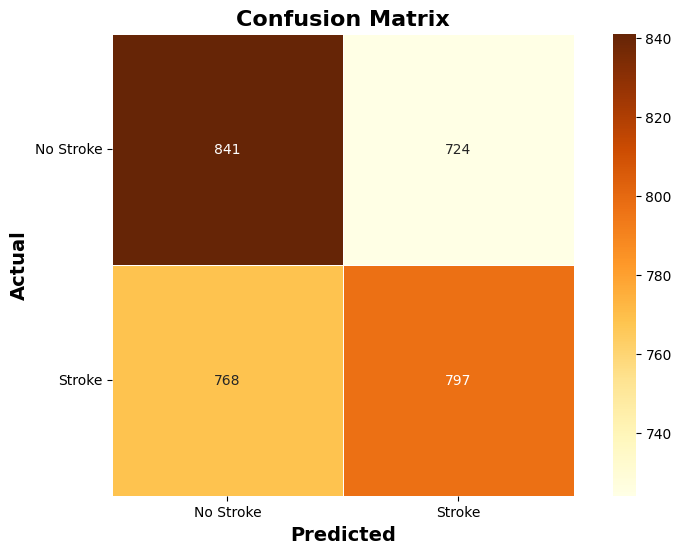

In [67]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
#Let's draw the confusion matrix according to the highest accuracy, that is, according to xgboost

x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, train_size=0.70, random_state=42)
boost = xgb.XGBClassifier()
model_boost = boost.fit(x1_train, y1_train)

y1_pred = model_boost.predict(x1_test)

cm = confusion_matrix(y1_test, y1_pred)

plt.figure(figsize=(10, 6))

sns.heatmap(
    cm, annot=True, fmt='d', cmap="YlOrBr", linewidths=0.4, square=True, cbar=True,
    xticklabels=["No Stroke", "Stroke"],
    yticklabels=["No Stroke", "Stroke"]
)

plt.xlabel('Predicted', fontsize=14, fontweight='bold')
plt.ylabel('Actual', fontsize=14, fontweight='bold')
plt.title('Confusion Matrix', fontsize=16, fontweight='bold')
plt.yticks(rotation=360)

plt.show()

# **Create the heat map of the correlation**

In [68]:
new_count_df = new_count_df.reindex(columns=['Age', 'Gender', 'Hypertension', 'Heart Disease', 'Marital Status',
       'Work Type', 'Residence Type', 'Average Glucose Level', 'Body Mass Index (BMI)',
       'Smoking Status', 'Alcohol Intake', 'Physical Activity',
       'Stroke History', 'Family History of Stroke', 'Dietary Habits',
       'Stress Levels', 'HDL', 'LDL', 'Upper BP', 'Lower BP', 'blurred_vision',	'confusion',
       'difficulty_speaking', 'dizziness', 'headache', 'loss_balance',	'numbness',	'seizures',
       'severe_fatigue', 'weakness', 'Diagnosis'])

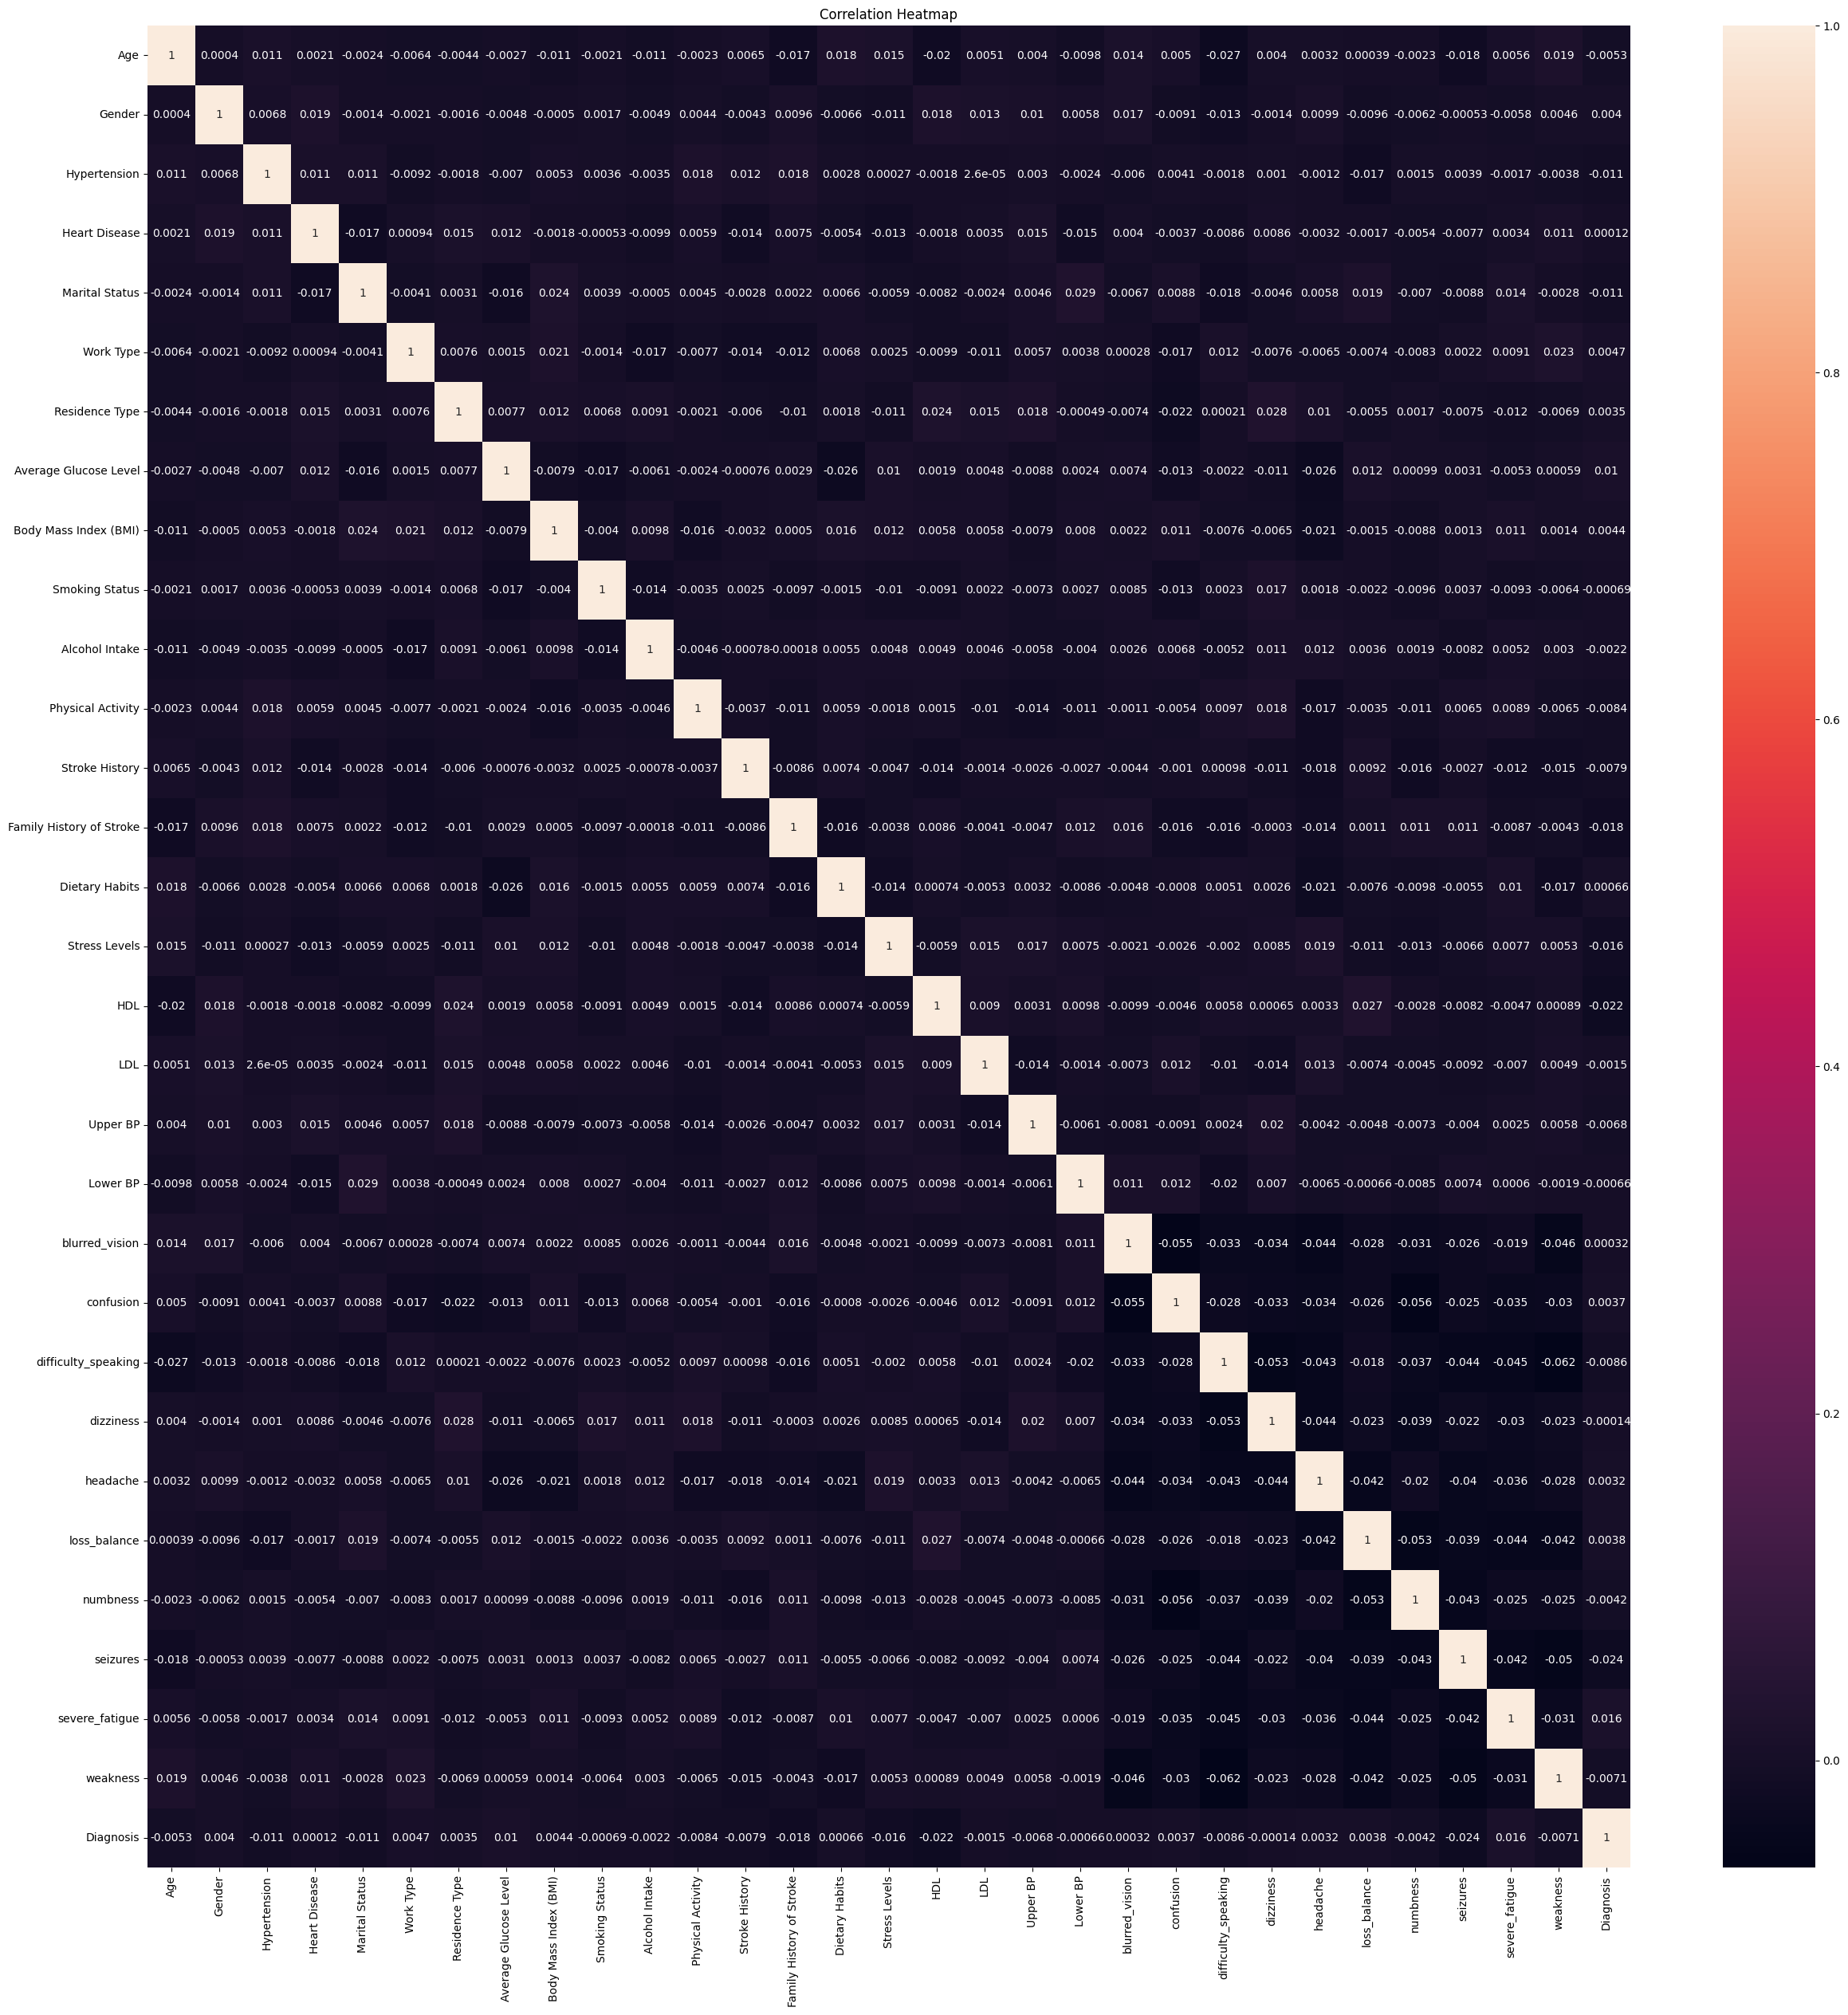

In [69]:
new_count_df.corr()
plt.figure(figsize=(30, 30))
sns.heatmap(new_count_df.corr(), annot=True)
plt.title('Correlation Heatmap')
plt.show()

# **Conclusion**

***This study aimed to develop and evaluate machine learning models for stroke prediction. As a result of the data set used and the methods applied, an average success rate of 52% was achieved. This reveals both the limitations of the data set and the complexity of stroke prediction. It is aimed to achieve higher success rates in the future with more comprehensive data sets and advanced modeling methods.***